# Line plots for trends

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DELL\Downloads\SampleSuperstore.csv", encoding='latin1')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
1          2  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
2          3  CA-2016-138688  06-12-2016   6-16-2016    Second Class   
3          4  US-2015-108966  10-11-2015  10-18-2015  Standard Class   
4          5  US-2015-108966  10-11-2015  10-18-2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1-21-2014   1-23-2014    Second Class   
9990    9991  CA-2017-121258   2-26-2017  03-03-2017  Standard Class   
9991    9992  CA-2017-121258   2-26-2017  03-03-2017  Standard Class   
9992    9993  CA-2017-121258   2-26-2017  03-03-2017  Standard Class   
9993    9994  CA-2017-119914  05-04-2017  05-09-2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

#  Convert 'Order Date' to datetime format

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date']

#  Create a new column for monthly order

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')

#  Group by Month and calculate total Sales and Profit

In [ ]:
monthly_trend = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()
monthly_trend['Month'] = monthly_trend['Month'].astype(str)  # Convert for plotting

#  Plotting Sales and Profit trends

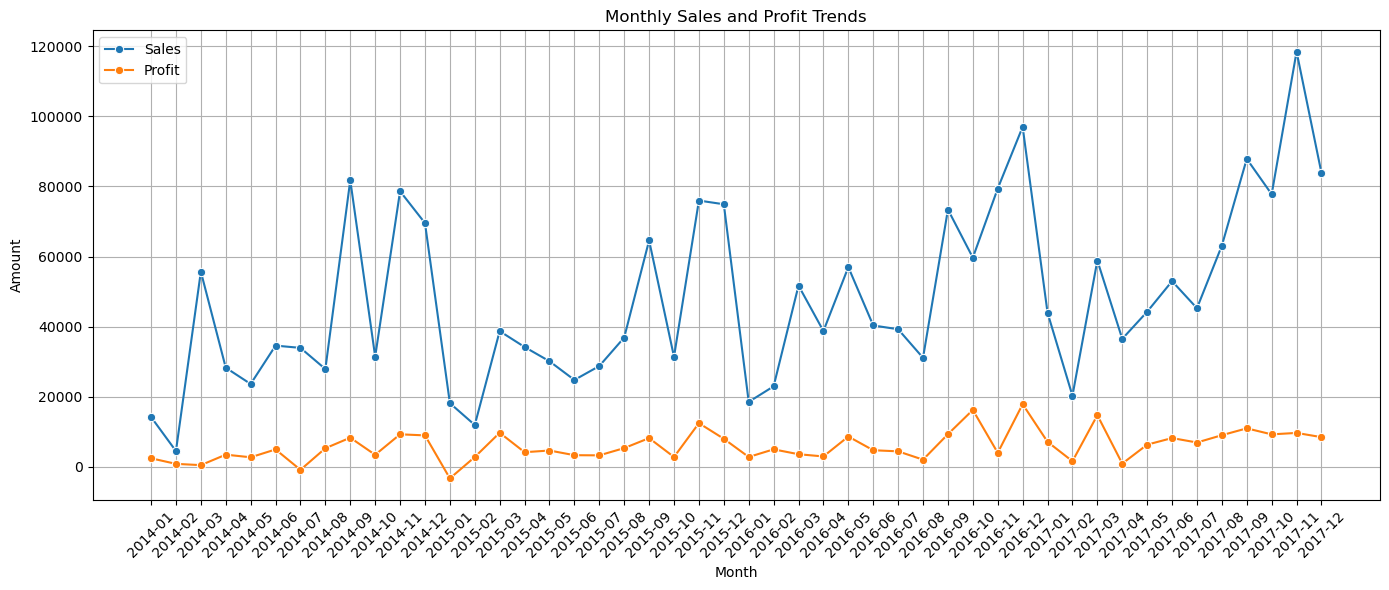

In [2]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='Month', y='Sales', label='Sales', marker='o')
sns.lineplot(data=monthly_trend, x='Month', y='Profit', label='Profit', marker='o')

plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Heatmaps for correlation

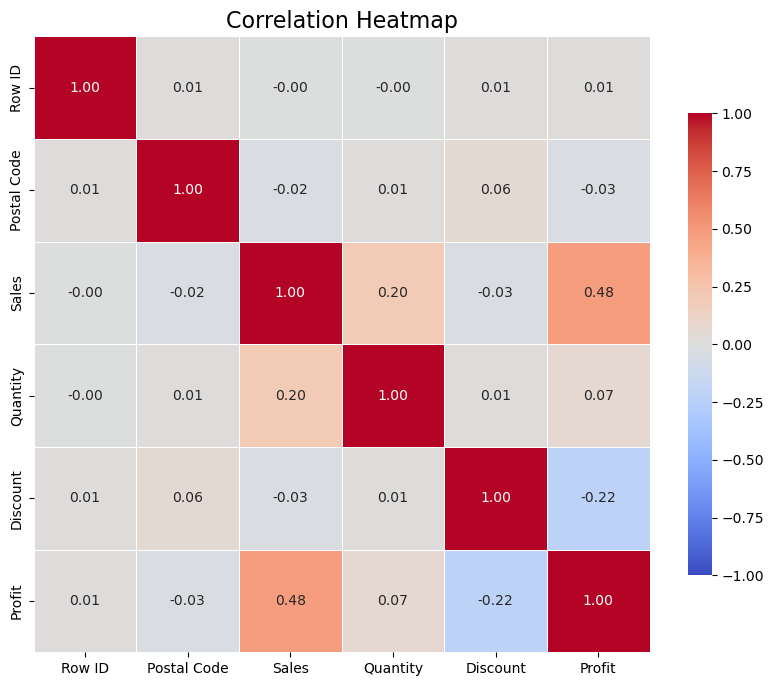

In [4]:

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,         # Display the correlation values
            fmt=".2f",          # Format for numbers
            cmap="coolwarm",    # Color map
            vmin=-1, vmax=1,    # Range of values
            square=True,        # Square cells
            linewidths=0.5,     # Line between cells
            cbar_kws={"shrink": .75})  # Color bar size

plt.title("Correlation Heatmap", fontsize=16)


plt.show()

# Histograms for distribution

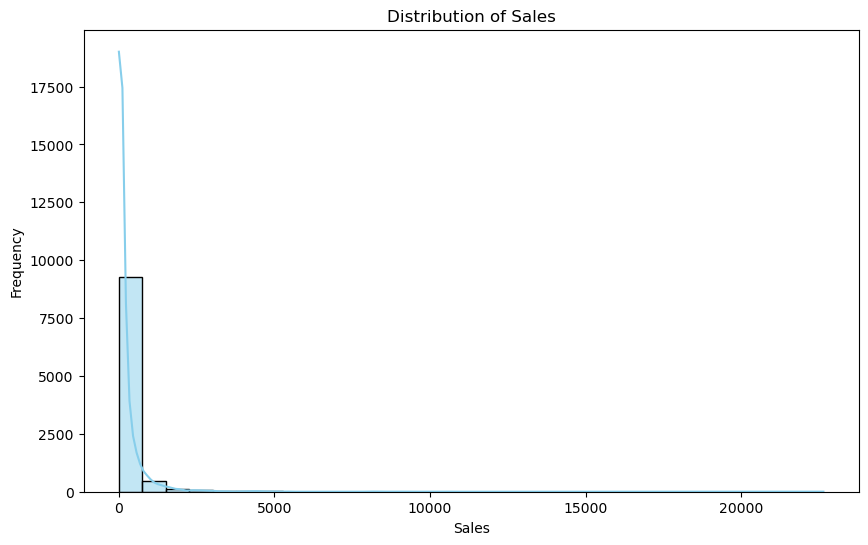

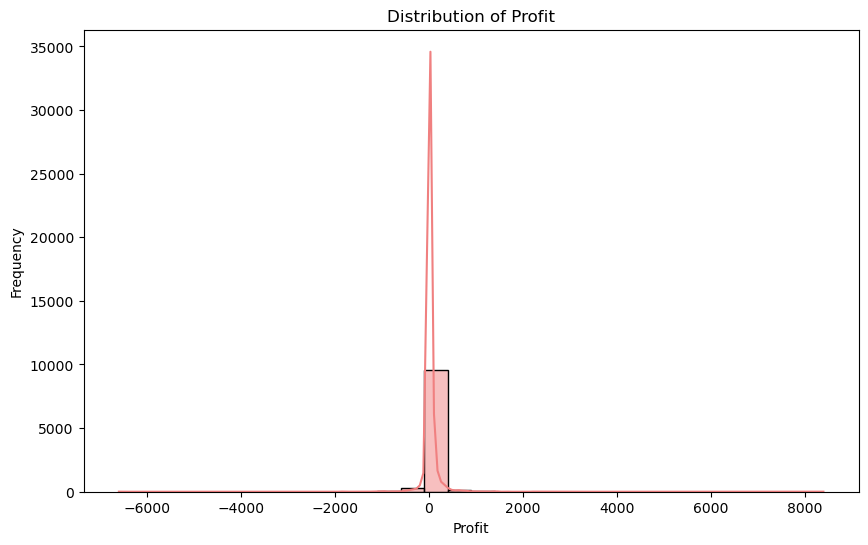

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sales', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# You can repeat for other numeric columns like Profit or Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Profit', bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()